<h1>Mini Projeto 08 - Análise dos dados da Escola Inteligente </h1>
<i> 
<br>
    <b> São dados no INEP fornecido via API </b> <br>
• Colocar o link JSON em uma variável e converter em Dataframe<br>
• Quantas escolas tem em cada estado e por cidade? <br>


<br>Fonte de dados: <b> Educação Inteligente</b><br>
site:http://educacao.dadosabertosbr.com/api/docs/%2Fapi%2Fescolas%2Fbuscaavancada

In [1]:
#Importando o Pandas, para limpeza de dados
#importando o Request para obter .json via API
#importando o matplotlib.pyplot para fazer o gráfico

import pandas as pd
import requests
import matplotlib.pyplot as plt


<h3> Obter Dados </h3>

In [2]:
#OBTER DADOS e colocando em uma variável
link = 'http://educacao.dadosabertosbr.com/api/escolas/buscaavancada?situacaoFuncionamento=1&energiaInexistente=on&aguaInexistente=on&esgotoInexistente=on&cozinha=on'
resposta = requests.get(link)

#Para exibir o link json em texto é só:
resposta.text


'[538,[{"anoCenso":2013,"cod":41036026,"nome":"BAIRRO DOS MENDES E R M EF","codCidade":4104402,"cidade":"CANDIDO DE ABREU","estado":"PR","regiao":"Sul","situacaoFuncionamento":1,"dependenciaAdministrativa":3,"idebAI":0.0,"idebAF":0.0,"enemMediaGeral":0.0,"situacaoFuncionamentoTxt":"Em atividade","dependenciaAdministrativaTxt":"Municipal"},{"anoCenso":2013,"cod":15008258,"nome":"E M E F AGUA AZUL","codCidade":1504802,"cidade":"MONTE ALEGRE","estado":"PA","regiao":"Norte","situacaoFuncionamento":1,"dependenciaAdministrativa":3,"idebAI":0.0,"idebAF":0.0,"enemMediaGeral":0.0,"situacaoFuncionamentoTxt":"Em atividade","dependenciaAdministrativaTxt":"Municipal"},{"anoCenso":2013,"cod":15534340,"nome":"E M E F AGUA BOA","codCidade":1505650,"cidade":"PLACAS","estado":"PA","regiao":"Norte","situacaoFuncionamento":1,"dependenciaAdministrativa":3,"idebAI":0.0,"idebAF":0.0,"enemMediaGeral":0.0,"situacaoFuncionamentoTxt":"Em atividade","dependenciaAdministrativaTxt":"Municipal"},{"anoCenso":2013,"co

<h3> Transoformar JSON em um Dataframe</h3> <i>ou em um dataset se for levar para PowerBI</i>


In [3]:
#Nesse json não tem chave, então vamos colocar o valor 1

dataset = pd.DataFrame(resposta.json()[1])

#Primeiras 2 linhas
display(dataset.head(2))

#Última linha
display(dataset.tail(1))

,anoCenso,cod,nome,codCidade,cidade,estado,regiao,situacaoFuncionamento,dependenciaAdministrativa,idebAI,idebAF,enemMediaGeral,situacaoFuncionamentoTxt,dependenciaAdministrativaTxt
0,2013,41036026,BAIRRO DOS MENDES E R M EF,4104402,CANDIDO DE ABREU,PR,Sul,1,3,0.0,0.0,0.0,Em atividade,Municipal
1,2013,15008258,E M E F AGUA AZUL,1504802,MONTE ALEGRE,PA,Norte,1,3,0.0,0.0,0.0,Em atividade,Municipal


,anoCenso,cod,nome,codCidade,cidade,estado,regiao,situacaoFuncionamento,dependenciaAdministrativa,idebAI,idebAF,enemMediaGeral,situacaoFuncionamentoTxt,dependenciaAdministrativaTxt
99,2013,15023664,E M E F RAIMUNDO NOGUEIRA,1500305,AFUA,PA,Norte,1,3,0.0,0.0,0.0,Em atividade,Municipal


In [4]:
print(dataset.dtypes)
print('\n')

#SHAPE (nº de linhas,nº de colunas )
shape = dataset.shape
print(shape)
print('linhas,colunas')

anoCenso                          int64
cod                               int64
nome                             object
codCidade                         int64
cidade                           object
estado                           object
regiao                           object
situacaoFuncionamento             int64
dependenciaAdministrativa         int64
idebAI                          float64
idebAF                          float64
enemMediaGeral                  float64
situacaoFuncionamentoTxt         object
dependenciaAdministrativaTxt     object
dtype: object


(100, 14)
linhas,colunas


<h3> Escola x Estado </h3>

In [28]:
dataset['estado'].value_counts()

PA    99
PR     1
Name: estado, dtype: int64

<h3> Escola x Cidade </h3>

In [6]:
dataset['cidade'].value_counts()

SAO DOMINGOS DO CAPIM         13
MONTE ALEGRE                  12
VISEU                         10
RUROPOLIS                      7
URUARA                         4
AFUA                           4
MOJU                           4
CAMETA                         4
CACHOEIRA DO ARARI             3
IPIXUNA DO PARA                3
NOVO REPARTIMENTO              3
MUANA                          3
OBIDOS                         3
SAO FELIX DO XINGU             3
TERRA SANTA                    2
OEIRAS DO PARA                 2
PACAJA                         2
CHAVES                         2
ACARA                          2
SANTA CRUZ DO ARARI            2
NOVA ESPERANCA DO PIRIA        1
ANAJAS                         1
SAO DOMINGOS DO ARAGUAIA       1
FARO                           1
PORTEL                         1
PLACAS                         1
GARRAFAO DO NORTE              1
CANDIDO DE ABREU               1
ANAPU                          1
AURORA DO PARA                 1
SAO SEBAST

<AxesSubplot:title={'center':'Quantidade de escolas por cidade'}, xlabel='\nescolas', ylabel='\nQuantidade'>

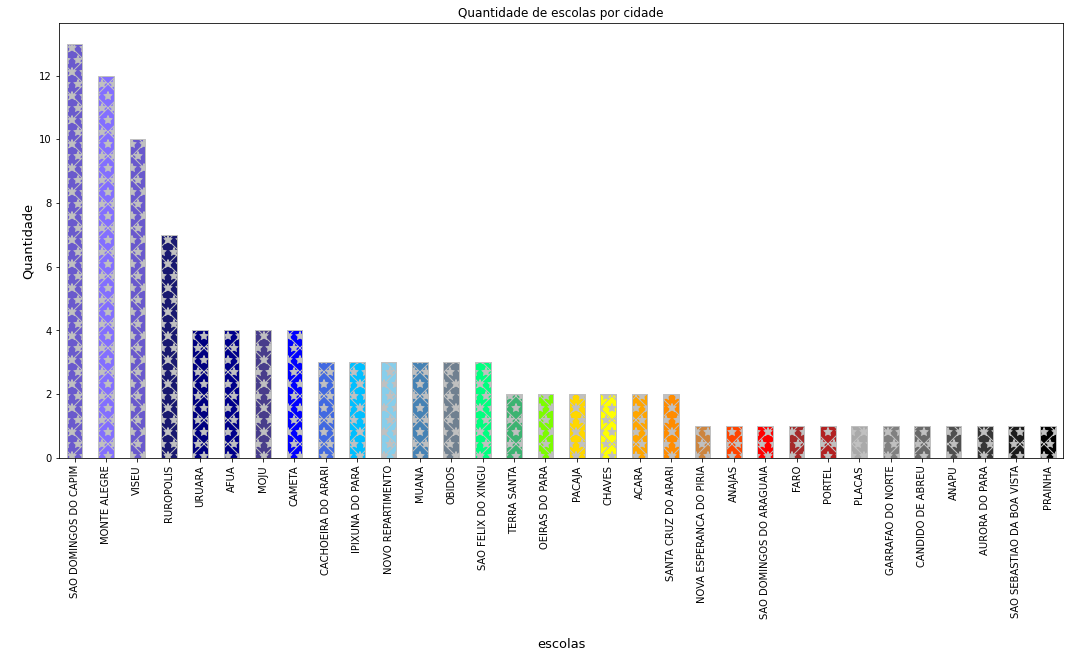

In [22]:
#Variável
escola_cidade = dataset['cidade'].value_counts()

#Tamanho do Gráfico
plt.figure(figsize=(18,8))

#Título do Gráfico
plt.title('Quantidade de escolas por cidade')

# Título Lateral e Título no Rodapé
plt.ylabel('\nQuantidade', fontsize='13')
plt.xlabel('\nescolas', fontsize='13')

escola_cidade.plot.bar( 
    color=['#6A5ACD','#836FFF' ,'#6959CD', '#191970','#000080', '#00008B','#483D8B','#0000FF','#4169E1','#00BFFF','#87CEEB','#4682B4','#708090','#00FF7F','#3CB371','#7CFC00','#FFD700','#FFFF00','#FFA500','#FF8C00','#CD853F','#FF4500','#FF0000','#A52A2A','#B22222','#A9A9A9','#808080','#696969','#4F4F4F','#363636','#1C1C1C','#000000'
],
    edgecolor='silver', linewidth=1,hatch='x.*'
)   